In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [2]:
path = r'C:\Users\Ravindu Ranaweera\Desktop\datasets\storypoint\IEEE TSE2018\dataset Anali' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

In [3]:
li = []

for filename in all_files:
    CSV_name  = filename.split("\\")[-1]
    df = pd.read_csv(CSV_name, index_col=None, header=0)
    df['project'] = CSV_name.split('.')[0]
#     print(df)
    li.append(df)
    
df = pd.concat(li, axis=0, ignore_index=True)

In [4]:
df

,issuekey,title,description,storypoint,project
0,TISTUD-6,Add CA against object literals in function inv...,{html}<div><p>The idea here is that if our met...,1,appceleratorstudio
1,TISTUD-9,Update branding for Appcelerator plugin to App...,"{html}<div><p>At least fix feature icons, asso...",1,appceleratorstudio
2,TISTUD-11,Create new JSON schema for SDK team,{html}<div><p>Create JSON schema containing pr...,1,appceleratorstudio
3,TISTUD-13,Create Project References Property Page,{html}<div><p>Create property page for project...,1,appceleratorstudio
4,TISTUD-16,New Desktop Project Wizard,{html}<div><p>Desktop (need to convert existin...,1,appceleratorstudio
...,...,...,...,...,...
23308,USERGRID-1256,Introduce Datastax Java Driver in effort to mi...,NaN,1,usergrid
23309,USERGRID-1267,Simplify Central SSO: eliminate ext token vali...,Instead of requiring that clients first valida...,3,usergrid
23310,USERGRID-1268,Proof of Concept: use Akka for Unique Value en...,"By using an distributed Actor System, we can e...",8,usergrid
23311,USERGRID-1272,Set a property to turn off usergrid's dependen...,Have a property that can tell Usergrid whether...,5,usergrid


In [5]:
df.count()

issuekey       23313
title          23313
description    21082
storypoint     23313
project        23313
dtype: int64

In [6]:
df.isnull().sum()

issuekey          0
title             0
description    2231
storypoint        0
project           0
dtype: int64

In [7]:
df = df.dropna()
df.count()

issuekey       21082
title          21082
description    21082
storypoint     21082
project        21082
dtype: int64

<AxesSubplot:>

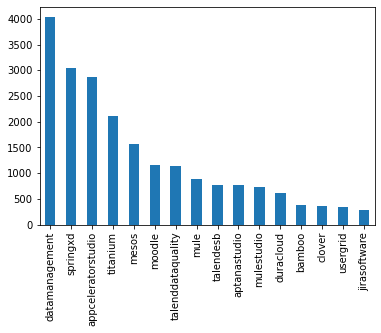

In [8]:
df['project'].value_counts().plot(kind= 'bar')

<AxesSubplot:>

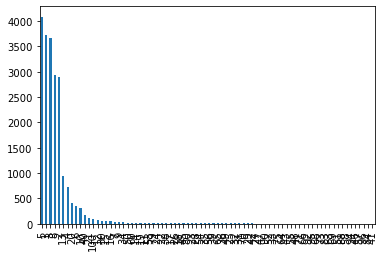

In [9]:
df['storypoint'].value_counts().plot(kind= 'bar')

In [10]:
storypoints = [0, 0.5, 1, 2, 3, 5, 8, 13, 20, 21, 34, 40, 55, 89, 100]
df2 = df[df['storypoint'].isin(storypoints)]

In [11]:
df2

,issuekey,title,description,storypoint,project
0,TISTUD-6,Add CA against object literals in function inv...,{html}<div><p>The idea here is that if our met...,1,appceleratorstudio
1,TISTUD-9,Update branding for Appcelerator plugin to App...,"{html}<div><p>At least fix feature icons, asso...",1,appceleratorstudio
2,TISTUD-11,Create new JSON schema for SDK team,{html}<div><p>Create JSON schema containing pr...,1,appceleratorstudio
3,TISTUD-13,Create Project References Property Page,{html}<div><p>Create property page for project...,1,appceleratorstudio
4,TISTUD-16,New Desktop Project Wizard,{html}<div><p>Desktop (need to convert existin...,1,appceleratorstudio
...,...,...,...,...,...
23307,USERGRID-1244,Upgrade pushy library to use latest version (H...,Additional system requirements will need to be...,2,usergrid
23309,USERGRID-1267,Simplify Central SSO: eliminate ext token vali...,Instead of requiring that clients first valida...,3,usergrid
23310,USERGRID-1268,Proof of Concept: use Akka for Unique Value en...,"By using an distributed Actor System, we can e...",8,usergrid
23311,USERGRID-1272,Set a property to turn off usergrid's dependen...,Have a property that can tell Usergrid whether...,5,usergrid


In [12]:
projects = df2['project'].value_counts()
projects.index.values

array(['appceleratorstudio', 'springxd', 'datamanagement', 'titanium',
       'mesos', 'moodle', 'talenddataquality', 'mule', 'talendesb',
       'aptanastudio', 'mulestudio', 'duracloud', 'bamboo', 'clover',
       'usergrid', 'jirasoftware'], dtype=object)

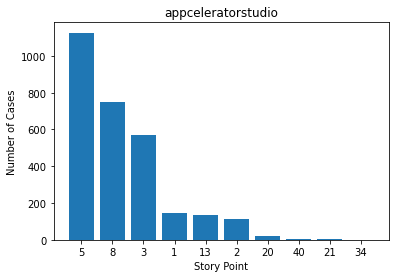

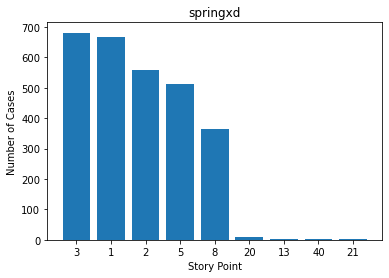

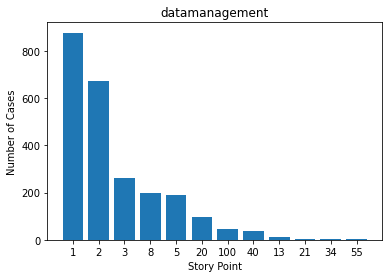

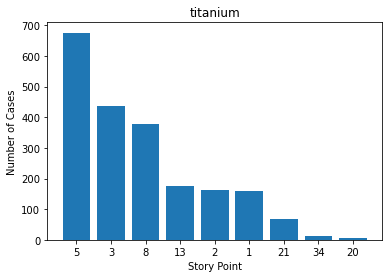

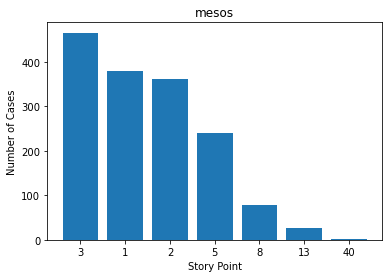

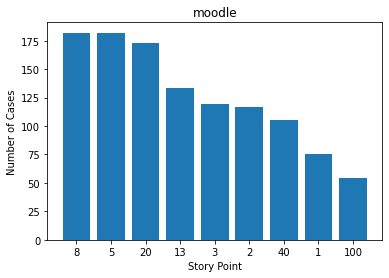

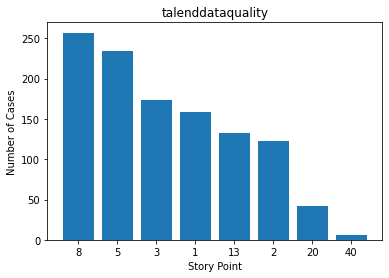

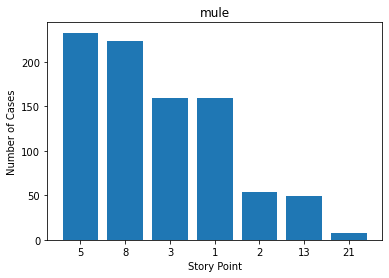

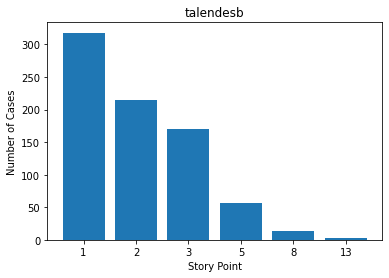

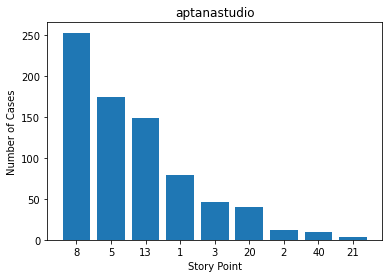

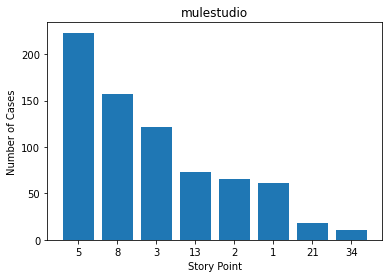

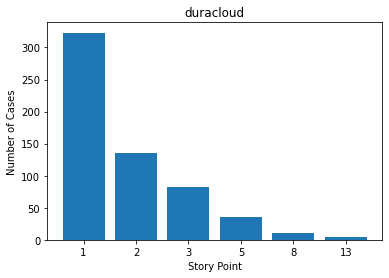

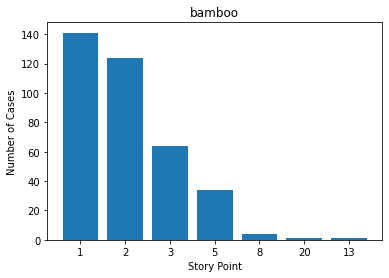

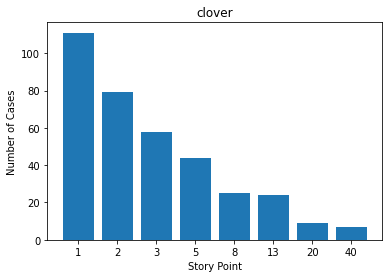

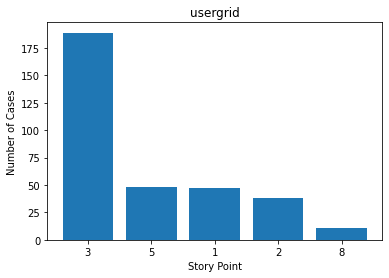

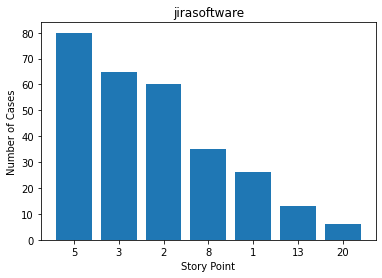

In [13]:
for x in projects.index.values:
    df3 = df2[df2['project'].isin([x])]
#     print(df3)
    chart = df3['storypoint'].value_counts()
#     print(chart)
    data = chart.values
    labels = chart.index.values
    plt.xticks(range(len(data)), labels)
    plt.xlabel('Story Point')
    plt.ylabel('Number of Cases')
    plt.title(x)
    plt.bar(range(len(data)), data) 
    plt.show()
    

<AxesSubplot:>

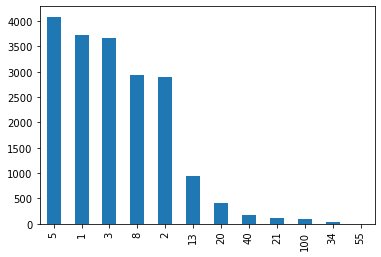

In [14]:
df2['storypoint'].value_counts().plot(kind= 'bar')

In [15]:
! pip install contractions

In [16]:
import nltk
nltk.download('stopwords')
import contractions
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import re, string, unicodedata

[nltk_data] Downloading package stopwords to C:\Users\Ravindu
[nltk_data]     Ranaweera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Removing Noise:

In [17]:
def text_lower(data):
    data = data.lower()
#     print(data)
    return data

In [18]:
#Removes HTML data
def remove_html(data):
    data = data.replace('html', '')
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

In [19]:
#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

In [20]:
#Removes round_brackets data
def remove_round_brackets(data):
    return re.sub('\(.*?\)','',data)

In [21]:
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data


In [22]:
def white_space(data):
    return ' '.join(data.split())

In [23]:
#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

In [24]:
for ind in df2.index:
    if(ind < 19054):
        description = df2['description'][ind]
#         print(type(description))
        description = text_lower(description)
#         print(type(description))
        description = remove_html(description)
#         print(type(description))
        description = remove_url(description)
#         print(type(description))
        description = remove_round_brackets(description)
#         print(type(description))
        description = remove_punctuations(description)
#         print(type(description))
        description = white_space(description)
#         print(type(description))
        description = remove_emoji(description)
#         print(type(description))
        df2['description'][ind] = description
        print(ind)
    else:
        break

C:\Users\Ravindu Ranaweera\AppData\Local\Temp\ipykernel_9568\1955768808.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['description'][ind] = description


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
108
109
110
111
112
113
119
120
121
122
124
125
126
127
128
129
130
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
224
226
227
228
229
230
231
232
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295


1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088


3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3637
3642
3643
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3688
3689
3690
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3719
3720
3721
3723
3724
3725
3726
3727
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3750
3751
3752
3753
3755
3756
3757
3758
3760
3764
3765
3766
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3782
3783
3784
3787
3788
3798
3799
3800
3801
3802
3803
3804
3805
3806
3808
3810
3811
3813
3816
3834
3839
3845
3851
3856
3857
3858
3859
3860
3862
3864
3865
3866
3867
3868
3869


6199
6201
6202
6203
6205
6206
6207
6208
6209
6214
6215
6216
6218
6221
6222
6223
6224
6226
6227
6229
6230
6234
6236
6237
6238
6244
6246
6248
6251
6256
6257
6258
6259
6260
6261
6264
6265
6266
6268
6269
6274
6277
6278
6280
6281
6282
6284
6288
6290
6298
6300
6304
6305
6306
6309
6310
6315
6316
6318
6319
6320
6321
6322
6323
6324
6326
6328
6329
6332
6333
6334
6335
6336
6337
6338
6339
6343
6345
6346
6347
6348
6349
6353
6354
6355
6356
6359
6360
6361
6362
6363
6364
6366
6367
6368
6370
6371
6372
6373
6375
6380
6386
6387
6388
6389
6390
6391
6392
6393
6394
6395
6398
6400
6401
6404
6405
6406
6407
6409
6410
6411
6416
6421
6423
6425
6426
6427
6428
6429
6431
6435
6437
6438
6447
6449
6451
6452
6453
6454
6455
6460
6462
6463
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6479
6482
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6506
6507
6508
6509
6510
6511
6512
6513
6517
6520
6523
6524
6525
6527
6528
6533
6536
6538
6539
6541
6542
6543
6546
6547
6548
6549
6553
6554
6558
6559
6560


9357
9359
9360
9361
9362
9364
9365
9366
9367
9373
9375
9376
9377
9378
9379
9380
9381
9382
9385
9386
9387
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9406
9407
9408
9409
9410
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9428
9429
9432
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9448
9449
9450
9453
9454
9455
9456
9457
9458
9459
9460
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9475
9476
9477
9478
9479
9481
9482
9483
9484
9485
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9529
9530
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580
9581
9582
9583
9585
9586
9587
9588
9589
9590


11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11014
11015
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
11037
11038
11039
11040
11041
11042
11043
11044
11045
11046
11047
11048
11049
11050
11051
11052
11053
11054
11055
11056
11057
11058
11059
11060
11061
11062
11063
11064
11065
11066
11067
11068
11069
11070
11071
11072
11073
11074
11075
11076
11077
11078
11079
11080
11081
11083
11084
11085
11086
11087
11089
11090
11091
11092
11093
11094
11095
11096
11097
11098
11099
11100
11101
11102
11103
11104
11105
11106
11107
11109
11110
11111
11113
11114
11115
11118
11119
11120
11121
11122
11123
11124
11125
11126
11127
11128
11129
11130
11131
11132
11133
11134
11135
11136
11137
11138
11139
11140
11141
11142
11143
11144
11145
11146
11147
11148
11149
11150
11151
11152
11153
11154
11155
11156
11161
11162
11163
11164
11165
11166
11167
11168
11169
11170
11171
11172
11173
11174
11175
11176
11177
11178
11179
11180
1118

12467
12468
12469
12470
12471
12472
12473
12474
12476
12477
12478
12479
12480
12481
12482
12483
12484
12485
12486
12487
12488
12489
12490
12491
12492
12493
12494
12495
12496
12497
12498
12499
12500
12501
12502
12503
12504
12505
12506
12507
12508
12510
12511
12512
12513
12514
12515
12516
12517
12518
12519
12520
12521
12522
12523
12524
12526
12527
12528
12529
12530
12531
12532
12533
12534
12535
12536
12537
12538
12539
12540
12541
12542
12543
12544
12545
12546
12547
12548
12549
12550
12551
12552
12553
12554
12555
12556
12557
12558
12559
12560
12561
12562
12563
12564
12565
12566
12567
12568
12569
12570
12571
12572
12573
12574
12575
12576
12577
12578
12579
12580
12581
12582
12583
12584
12585
12586
12587
12588
12589
12590
12591
12592
12593
12594
12595
12596
12597
12598
12599
12600
12603
12604
12605
12606
12607
12608
12609
12610
12611
12612
12613
12614
12615
12616
12617
12618
12619
12620
12621
12622
12623
12624
12625
12626
12627
12628
12629
12630
12631
12632
12633
12634
12635
12636
12637
1263

13858
13859
13860
13861
13862
13863
13864
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880
13881
13882
13883
13884
13885
13886
13887
13888
13889
13890
13891
13892
13893
13894
13895
13896
13897
13898
13899
13900
13901
13902
13903
13904
13905
13906
13907
13908
13909
13910
13911
13912
13913
13914
13915
13916
13917
13918
13919
13920
13921
13922
13923
13924
13925
13926
13927
13928
13929
13930
13931
13932
13933
13934
13935
13936
13937
13938
13939
13940
13941
13942
13943
13944
13945
13946
13947
13948
13949
13950
13951
13952
13953
13954
13955
13956
13957
13958
13959
13960
13961
13962
13963
13964
13965
13966
13967
13968
13969
13970
13971
13972
13973
13974
13975
13976
13977
13978
13979
13980
13981
13982
13983
13984
13985
13986
13987
13988
13989
13990
13991
13992
13993
13994
13995
13996
13997
13998
13999
14000
14001
14002
14003
14004
14005
14006
14007
14008
14009
14010
14011
14012
14013
14014
14015
14016
14017
14018
14019
14020
14021
14022
14023
1402

15433
15434
15435
15436
15437
15438
15439
15440
15441
15442
15444
15445
15446
15447
15450
15451
15452
15453
15454
15456
15457
15458
15459
15460
15461
15463
15464
15465
15466
15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15482
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15499
15500
15501
15502
15503
15504
15506
15511
15512
15513
15515
15516
15517
15519
15520
15521
15522
15523
15524
15525
15526
15527
15528
15530
15531
15532
15533
15534
15535
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15548
15549
15550
15552
15555
15557
15558
15559
15560
15561
15562
15563
15564
15565
15567
15568
15569
15570
15571
15573
15577
15578
15579
15580
15585
15586
15587
15588
15589
15590
15591
15592
15594
15595
15596
15597
15598
15602
15603
15604
15605
15606
15607
15608
15609
15611
15612
15613
15614
15615
15616
15617
15620
15622
15623
15624
15625
15626
15627
15629
15630
15631
15632
15633
15634
15635
15636
15639
15640
15642
15643
15644
1564

17258
17261
17263
17264
17265
17266
17267
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17298
17299
17300
17301
17302
17303
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17357
17358
17359
17363
17364
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17409
17410
17411
17412
17413
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
17428
17429
17430
17431
17432
17433
17434
17435
17436
17437
17438
17439
17440
17441
17442
17443
17444
1744

18734
18735
18736
18737
18738
18741
18743
18744
18745
18747
18748
18749
18750
18751
18753
18755
18758
18759
18760
18761
18762
18763
18766
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18783
18785
18786
18787
18788
18789
18790
18791
18792
18794
18795
18797
18798
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18815
18818
18819
18820
18821
18822
18823
18824
18825
18827
18828
18829
18830
18831
18832
18833
18834
18836
18837
18838
18839
18840
18841
18844
18860
18861
18864
18865
18866
18867
18868
18869
18871
18872
18873
18874
18875
18876
18877
18878
18879
18880
18881
18882
18883
18884
18885
18886
18887
18888
18889
18890
18891
18892
18893
18894
18895
18896
18897
18898
18899
18900
18902
18904
18905
18906
18907
18908
18909
18910
18911
18912
18913
18915
18916
18917
18918
18919
18920
18923
18924
18925
18926
18927
18928
18930
18932
18933
18934
18935
18936
18938
18939
18940
18941
18943
18944
18945
18947
18948
18949
18950
18951
18952
18953
1895

In [25]:
for ind in df2.index:
    if(ind < 19054):
        title = df2['title'][ind]
        title = text_lower(title)
        title = remove_html(title)
        title = remove_url(title)
        title = remove_round_brackets(title)
        title = remove_punctuations(title)
        title = white_space(title)
        title = remove_emoji(title)
        df2['title'][ind] = title
        print(ind)
    else:
        break

0
1
2
3
4
5


C:\Users\Ravindu Ranaweera\AppData\Local\Temp\ipykernel_9568\2001542436.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['title'][ind] = title


6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
108
109
110
111
112
113
119
120
121
122
124
125
126
127
128
129
130
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
224
226
227
228
229
230
231
232
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298


1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095


3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3637
3642
3643
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3688
3689
3690
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3719
3720
3721
3723
3724
3725
3726
3727
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3750
3751
3752
3753
3755
3756
3757
3758
3760
3764
3765
3766
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3782
3783
3784
3787
3788
3798
3799
3800
3801
3802
3803
3804
3805
3806
3808
3810
3811
3813
3816
3834
3839
3845
3851
3856
3857
3858
3859
3860
3862
3864
3865
3866
3867
3868
3869
3870
3871
3874
3875
3876
3878
3879
3880
3881


6216
6218
6221
6222
6223
6224
6226
6227
6229
6230
6234
6236
6237
6238
6244
6246
6248
6251
6256
6257
6258
6259
6260
6261
6264
6265
6266
6268
6269
6274
6277
6278
6280
6281
6282
6284
6288
6290
6298
6300
6304
6305
6306
6309
6310
6315
6316
6318
6319
6320
6321
6322
6323
6324
6326
6328
6329
6332
6333
6334
6335
6336
6337
6338
6339
6343
6345
6346
6347
6348
6349
6353
6354
6355
6356
6359
6360
6361
6362
6363
6364
6366
6367
6368
6370
6371
6372
6373
6375
6380
6386
6387
6388
6389
6390
6391
6392
6393
6394
6395
6398
6400
6401
6404
6405
6406
6407
6409
6410
6411
6416
6421
6423
6425
6426
6427
6428
6429
6431
6435
6437
6438
6447
6449
6451
6452
6453
6454
6455
6460
6462
6463
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6479
6482
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6506
6507
6508
6509
6510
6511
6512
6513
6517
6520
6523
6524
6525
6527
6528
6533
6536
6538
6539
6541
6542
6543
6546
6547
6548
6549
6553
6554
6558
6559
6560
6561
6564
6565
6566
6568
6575
6585
6588
6589
6590
6594


9365
9366
9367
9373
9375
9376
9377
9378
9379
9380
9381
9382
9385
9386
9387
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9406
9407
9408
9409
9410
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9428
9429
9432
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9448
9449
9450
9453
9454
9455
9456
9457
9458
9459
9460
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9475
9476
9477
9478
9479
9481
9482
9483
9484
9485
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9529
9530
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580
9581
9582
9583
9585
9586
9587
9588
9589
9590
9591
9592
9593
9594
9595
9596


11010
11011
11012
11014
11015
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
11037
11038
11039
11040
11041
11042
11043
11044
11045
11046
11047
11048
11049
11050
11051
11052
11053
11054
11055
11056
11057
11058
11059
11060
11061
11062
11063
11064
11065
11066
11067
11068
11069
11070
11071
11072
11073
11074
11075
11076
11077
11078
11079
11080
11081
11083
11084
11085
11086
11087
11089
11090
11091
11092
11093
11094
11095
11096
11097
11098
11099
11100
11101
11102
11103
11104
11105
11106
11107
11109
11110
11111
11113
11114
11115
11118
11119
11120
11121
11122
11123
11124
11125
11126
11127
11128
11129
11130
11131
11132
11133
11134
11135
11136
11137
11138
11139
11140
11141
11142
11143
11144
11145
11146
11147
11148
11149
11150
11151
11152
11153
11154
11155
11156
11161
11162
11163
11164
11165
11166
11167
11168
11169
11170
11171
11172
11173
11174
11175
11176
11177
11178
11179
11180
11181
11182
11183
11184
11185
11186
11187
1118

12478
12479
12480
12481
12482
12483
12484
12485
12486
12487
12488
12489
12490
12491
12492
12493
12494
12495
12496
12497
12498
12499
12500
12501
12502
12503
12504
12505
12506
12507
12508
12510
12511
12512
12513
12514
12515
12516
12517
12518
12519
12520
12521
12522
12523
12524
12526
12527
12528
12529
12530
12531
12532
12533
12534
12535
12536
12537
12538
12539
12540
12541
12542
12543
12544
12545
12546
12547
12548
12549
12550
12551
12552
12553
12554
12555
12556
12557
12558
12559
12560
12561
12562
12563
12564
12565
12566
12567
12568
12569
12570
12571
12572
12573
12574
12575
12576
12577
12578
12579
12580
12581
12582
12583
12584
12585
12586
12587
12588
12589
12590
12591
12592
12593
12594
12595
12596
12597
12598
12599
12600
12603
12604
12605
12606
12607
12608
12609
12610
12611
12612
12613
12614
12615
12616
12617
12618
12619
12620
12621
12622
12623
12624
12625
12626
12627
12628
12629
12630
12631
12632
12633
12634
12635
12636
12637
12638
12639
12640
12641
12642
12643
12644
12645
12646
12647
1264

13862
13863
13864
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880
13881
13882
13883
13884
13885
13886
13887
13888
13889
13890
13891
13892
13893
13894
13895
13896
13897
13898
13899
13900
13901
13902
13903
13904
13905
13906
13907
13908
13909
13910
13911
13912
13913
13914
13915
13916
13917
13918
13919
13920
13921
13922
13923
13924
13925
13926
13927
13928
13929
13930
13931
13932
13933
13934
13935
13936
13937
13938
13939
13940
13941
13942
13943
13944
13945
13946
13947
13948
13949
13950
13951
13952
13953
13954
13955
13956
13957
13958
13959
13960
13961
13962
13963
13964
13965
13966
13967
13968
13969
13970
13971
13972
13973
13974
13975
13976
13977
13978
13979
13980
13981
13982
13983
13984
13985
13986
13987
13988
13989
13990
13991
13992
13993
13994
13995
13996
13997
13998
13999
14000
14001
14002
14003
14004
14005
14006
14007
14008
14009
14010
14011
14012
14013
14014
14015
14016
14017
14018
14019
14020
14021
14022
14023
14024
14025
14026
14027
1402

15438
15439
15440
15441
15442
15444
15445
15446
15447
15450
15451
15452
15453
15454
15456
15457
15458
15459
15460
15461
15463
15464
15465
15466
15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15482
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15499
15500
15501
15502
15503
15504
15506
15511
15512
15513
15515
15516
15517
15519
15520
15521
15522
15523
15524
15525
15526
15527
15528
15530
15531
15532
15533
15534
15535
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15548
15549
15550
15552
15555
15557
15558
15559
15560
15561
15562
15563
15564
15565
15567
15568
15569
15570
15571
15573
15577
15578
15579
15580
15585
15586
15587
15588
15589
15590
15591
15592
15594
15595
15596
15597
15598
15602
15603
15604
15605
15606
15607
15608
15609
15611
15612
15613
15614
15615
15616
15617
15620
15622
15623
15624
15625
15626
15627
15629
15630
15631
15632
15633
15634
15635
15636
15639
15640
15642
15643
15644
15645
15646
15647
15648
15649
1565

17264
17265
17266
17267
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17298
17299
17300
17301
17302
17303
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17357
17358
17359
17363
17364
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17409
17410
17411
17412
17413
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
17428
17429
17430
17431
17432
17433
17434
17435
17436
17437
17438
17439
17440
17441
17442
17443
17444
17445
17446
17447
1744

18730
18731
18732
18733
18734
18735
18736
18737
18738
18741
18743
18744
18745
18747
18748
18749
18750
18751
18753
18755
18758
18759
18760
18761
18762
18763
18766
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18783
18785
18786
18787
18788
18789
18790
18791
18792
18794
18795
18797
18798
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18815
18818
18819
18820
18821
18822
18823
18824
18825
18827
18828
18829
18830
18831
18832
18833
18834
18836
18837
18838
18839
18840
18841
18844
18860
18861
18864
18865
18866
18867
18868
18869
18871
18872
18873
18874
18875
18876
18877
18878
18879
18880
18881
18882
18883
18884
18885
18886
18887
18888
18889
18890
18891
18892
18893
18894
18895
18896
18897
18898
18899
18900
18902
18904
18905
18906
18907
18908
18909
18910
18911
18912
18913
18915
18916
18917
18918
18919
18920
18923
18924
18925
18926
18927
18928
18930
18932
18933
18934
18935
18936
18938
18939
18940
18941
18943
18944
18945
18947
18948
18949
1895

#### Normalizing text: 

In [26]:
def contraction_replace(data):
    data = contractions.fix(data)
#     print(data)
    return data

In [27]:
pip install inflect

Note: you may need to restart the kernel to use updated packages.


In [28]:
import inflect

In [29]:
def number_to_text(data):
    temp_str = data.split()
    string = []
    for i in temp_str:
        # if the word is digit, converted to 
        # word else the sequence continues
        if i.isdigit():
            temp = inflect.engine().number_to_words(i)
            string.append(temp)
        else:
            string.append(i)
#     print(data)
    return temp_str

In [30]:
def stopword(data):
    clean = []
    for i in data:
        if i not in stopwords.words('english'):
            clean.append(i)
    data = ' '.join(clean)
    return data

In [31]:
def stemming(data):
    stemmer = LancasterStemmer()
    stemmed = []
    for i in data:
        stem = stemmer.stem(i)
        stemmed.append(stem)
    return stemmed

In [32]:
def lemmatization(data):
    nltk.download('wordnet')
    lemma = WordNetLemmatizer()
    lemmas = []
    for i in data:
        lem = lemma.lemmatize(i, pos='v')
        lemmas.append(lem)
    return lemmas 

In [33]:
for ind in df2.index:
    if(ind < 19054):
        description = df2['description'][ind]
        description = contraction_replace(description)
        description = word_tokenize(description)
        description = stopword(description)
        df2['description'][ind] = description
        print(ind)
    else:
        break

C:\Users\Ravindu Ranaweera\AppData\Local\Temp\ipykernel_9568\2395644189.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['description'][ind] = description


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
108
109
110
111
112
113
119
120
121
122
124
125
126
127
128
129
130
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
224
226
227
228
229
230
231
232
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295


1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085


3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3637
3642
3643
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3688
3689
3690
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3719
3720
3721
3723
3724
3725
3726
3727
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3750
3751
3752
3753
3755
3756
3757
3758
3760
3764
3765
3766
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3782
3783
3784
3787
3788
3798
3799
3800
3801
3802
3803
3804
3805
3806
3808
3810
3811
3813
3816
3834
3839
3845
3851
3856
3857
3858
3859
3860
3862
3864
3865


6188
6189
6191
6192
6193
6199
6201
6202
6203
6205
6206
6207
6208
6209
6214
6215
6216
6218
6221
6222
6223
6224
6226
6227
6229
6230
6234
6236
6237
6238
6244
6246
6248
6251
6256
6257
6258
6259
6260
6261
6264
6265
6266
6268
6269
6274
6277
6278
6280
6281
6282
6284
6288
6290
6298
6300
6304
6305
6306
6309
6310
6315
6316
6318
6319
6320
6321
6322
6323
6324
6326
6328
6329
6332
6333
6334
6335
6336
6337
6338
6339
6343
6345
6346
6347
6348
6349
6353
6354
6355
6356
6359
6360
6361
6362
6363
6364
6366
6367
6368
6370
6371
6372
6373
6375
6380
6386
6387
6388
6389
6390
6391
6392
6393
6394
6395
6398
6400
6401
6404
6405
6406
6407
6409
6410
6411
6416
6421
6423
6425
6426
6427
6428
6429
6431
6435
6437
6438
6447
6449
6451
6452
6453
6454
6455
6460
6462
6463
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6479
6482
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6506
6507
6508
6509
6510
6511
6512
6513
6517
6520
6523
6524
6525
6527
6528
6533
6536
6538
6539
6541
6542
6543
6546
6547
6548
6549


9346
9348
9350
9351
9352
9353
9354
9355
9356
9357
9359
9360
9361
9362
9364
9365
9366
9367
9373
9375
9376
9377
9378
9379
9380
9381
9382
9385
9386
9387
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9406
9407
9408
9409
9410
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9428
9429
9432
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9448
9449
9450
9453
9454
9455
9456
9457
9458
9459
9460
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9475
9476
9477
9478
9479
9481
9482
9483
9484
9485
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9529
9530
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580


10988
10989
10990
10991
10992
10993
10994
10995
10996
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11014
11015
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
11037
11038
11039
11040
11041
11042
11043
11044
11045
11046
11047
11048
11049
11050
11051
11052
11053
11054
11055
11056
11057
11058
11059
11060
11061
11062
11063
11064
11065
11066
11067
11068
11069
11070
11071
11072
11073
11074
11075
11076
11077
11078
11079
11080
11081
11083
11084
11085
11086
11087
11089
11090
11091
11092
11093
11094
11095
11096
11097
11098
11099
11100
11101
11102
11103
11104
11105
11106
11107
11109
11110
11111
11113
11114
11115
11118
11119
11120
11121
11122
11123
11124
11125
11126
11127
11128
11129
11130
11131
11132
11133
11134
11135
11136
11137
11138
11139
11140
11141
11142
11143
11144
11145
11146
11147
11148
11149
11150
11151
11152
11153
11154
11155
11156
11161
11162
11163
11164
11165
1116

12450
12451
12452
12453
12454
12456
12457
12458
12459
12460
12461
12462
12463
12464
12465
12466
12467
12468
12469
12470
12471
12472
12473
12474
12476
12477
12478
12479
12480
12481
12482
12483
12484
12485
12486
12487
12488
12489
12490
12491
12492
12493
12494
12495
12496
12497
12498
12499
12500
12501
12502
12503
12504
12505
12506
12507
12508
12510
12511
12512
12513
12514
12515
12516
12517
12518
12519
12520
12521
12522
12523
12524
12526
12527
12528
12529
12530
12531
12532
12533
12534
12535
12536
12537
12538
12539
12540
12541
12542
12543
12544
12545
12546
12547
12548
12549
12550
12551
12552
12553
12554
12555
12556
12557
12558
12559
12560
12561
12562
12563
12564
12565
12566
12567
12568
12569
12570
12571
12572
12573
12574
12575
12576
12577
12578
12579
12580
12581
12582
12583
12584
12585
12586
12587
12588
12589
12590
12591
12592
12593
12594
12595
12596
12597
12598
12599
12600
12603
12604
12605
12606
12607
12608
12609
12610
12611
12612
12613
12614
12615
12616
12617
12618
12619
12620
12621
1262

13838
13839
13840
13841
13842
13843
13844
13845
13846
13847
13848
13849
13850
13851
13852
13853
13854
13855
13856
13857
13858
13859
13860
13861
13862
13863
13864
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880
13881
13882
13883
13884
13885
13886
13887
13888
13889
13890
13891
13892
13893
13894
13895
13896
13897
13898
13899
13900
13901
13902
13903
13904
13905
13906
13907
13908
13909
13910
13911
13912
13913
13914
13915
13916
13917
13918
13919
13920
13921
13922
13923
13924
13925
13926
13927
13928
13929
13930
13931
13932
13933
13934
13935
13936
13937
13938
13939
13940
13941
13942
13943
13944
13945
13946
13947
13948
13949
13950
13951
13952
13953
13954
13955
13956
13957
13958
13959
13960
13961
13962
13963
13964
13965
13966
13967
13968
13969
13970
13971
13972
13973
13974
13975
13976
13977
13978
13979
13980
13981
13982
13983
13984
13985
13986
13987
13988
13989
13990
13991
13992
13993
13994
13995
13996
13997
13998
13999
14000
14001
14002
14003
1400

15407
15408
15410
15413
15414
15415
15418
15419
15421
15422
15424
15425
15426
15428
15429
15431
15432
15433
15434
15435
15436
15437
15438
15439
15440
15441
15442
15444
15445
15446
15447
15450
15451
15452
15453
15454
15456
15457
15458
15459
15460
15461
15463
15464
15465
15466
15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15482
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15499
15500
15501
15502
15503
15504
15506
15511
15512
15513
15515
15516
15517
15519
15520
15521
15522
15523
15524
15525
15526
15527
15528
15530
15531
15532
15533
15534
15535
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15548
15549
15550
15552
15555
15557
15558
15559
15560
15561
15562
15563
15564
15565
15567
15568
15569
15570
15571
15573
15577
15578
15579
15580
15585
15586
15587
15588
15589
15590
15591
15592
15594
15595
15596
15597
15598
15602
15603
15604
15605
15606
15607
15608
15609
15611
15612
15613
15614
15615
15616
15617
15620
15622
15623
1562

17241
17243
17244
17246
17247
17248
17249
17250
17252
17253
17254
17255
17256
17257
17258
17261
17263
17264
17265
17266
17267
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17298
17299
17300
17301
17302
17303
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17357
17358
17359
17363
17364
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17409
17410
17411
17412
17413
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
17428
17429
17430
1743

18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18723
18725
18726
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18741
18743
18744
18745
18747
18748
18749
18750
18751
18753
18755
18758
18759
18760
18761
18762
18763
18766
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18783
18785
18786
18787
18788
18789
18790
18791
18792
18794
18795
18797
18798
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18815
18818
18819
18820
18821
18822
18823
18824
18825
18827
18828
18829
18830
18831
18832
18833
18834
18836
18837
18838
18839
18840
18841
18844
18860
18861
18864
18865
18866
18867
18868
18869
18871
18872
18873
18874
18875
18876
18877
18878
18879
18880
18881
18882
18883
18884
18885
18886
18887
18888
18889
18890
18891
18892
18893
18894
18895
18896
18897
18898
18899
18900
18902
18904
18905
18906
18907
18908
18909
18910
18911
18912
18913
18915
18916
18917
18918
18919
18920
18923
18924
18925
18926
18927
18928
1893

In [34]:
for ind in df2.index:
    if(ind < 19054):
        title = df2['title'][ind]
        title = contraction_replace(title)
        title = word_tokenize(title)
        title = stopword(title)
        df2['title'][ind] = title
        print(ind)
    else:
        break

C:\Users\Ravindu Ranaweera\AppData\Local\Temp\ipykernel_9568\1457862452.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['title'][ind] = title


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
108
109
110
111
112
113
119
120
121
122
124
125
126
127
128
129
130
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
224
226
227
228
229
230
231
232
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295


1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085


3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3637
3642
3643
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3688
3689
3690
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3719
3720
3721
3723
3724
3725
3726
3727
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3750
3751
3752
3753
3755
3756
3757
3758
3760
3764
3765
3766
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3782
3783
3784
3787
3788
3798
3799
3800
3801
3802
3803
3804
3805
3806
3808
3810
3811
3813
3816
3834
3839
3845
3851
3856
3857
3858
3859
3860
3862
3864
3865


6193
6199
6201
6202
6203
6205
6206
6207
6208
6209
6214
6215
6216
6218
6221
6222
6223
6224
6226
6227
6229
6230
6234
6236
6237
6238
6244
6246
6248
6251
6256
6257
6258
6259
6260
6261
6264
6265
6266
6268
6269
6274
6277
6278
6280
6281
6282
6284
6288
6290
6298
6300
6304
6305
6306
6309
6310
6315
6316
6318
6319
6320
6321
6322
6323
6324
6326
6328
6329
6332
6333
6334
6335
6336
6337
6338
6339
6343
6345
6346
6347
6348
6349
6353
6354
6355
6356
6359
6360
6361
6362
6363
6364
6366
6367
6368
6370
6371
6372
6373
6375
6380
6386
6387
6388
6389
6390
6391
6392
6393
6394
6395
6398
6400
6401
6404
6405
6406
6407
6409
6410
6411
6416
6421
6423
6425
6426
6427
6428
6429
6431
6435
6437
6438
6447
6449
6451
6452
6453
6454
6455
6460
6462
6463
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6479
6482
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6506
6507
6508
6509
6510
6511
6512
6513
6517
6520
6523
6524
6525
6527
6528
6533
6536
6538
6539
6541
6542
6543
6546
6547
6548
6549
6553
6554
6558
6559


9356
9357
9359
9360
9361
9362
9364
9365
9366
9367
9373
9375
9376
9377
9378
9379
9380
9381
9382
9385
9386
9387
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9406
9407
9408
9409
9410
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9428
9429
9432
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9448
9449
9450
9453
9454
9455
9456
9457
9458
9459
9460
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9475
9476
9477
9478
9479
9481
9482
9483
9484
9485
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9529
9530
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580
9581
9582
9583
9585
9586
9587
9588
9589


10996
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11014
11015
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
11037
11038
11039
11040
11041
11042
11043
11044
11045
11046
11047
11048
11049
11050
11051
11052
11053
11054
11055
11056
11057
11058
11059
11060
11061
11062
11063
11064
11065
11066
11067
11068
11069
11070
11071
11072
11073
11074
11075
11076
11077
11078
11079
11080
11081
11083
11084
11085
11086
11087
11089
11090
11091
11092
11093
11094
11095
11096
11097
11098
11099
11100
11101
11102
11103
11104
11105
11106
11107
11109
11110
11111
11113
11114
11115
11118
11119
11120
11121
11122
11123
11124
11125
11126
11127
11128
11129
11130
11131
11132
11133
11134
11135
11136
11137
11138
11139
11140
11141
11142
11143
11144
11145
11146
11147
11148
11149
11150
11151
11152
11153
11154
11155
11156
11161
11162
11163
11164
11165
11166
11167
11168
11169
11170
11171
11172
11173
1117

12463
12464
12465
12466
12467
12468
12469
12470
12471
12472
12473
12474
12476
12477
12478
12479
12480
12481
12482
12483
12484
12485
12486
12487
12488
12489
12490
12491
12492
12493
12494
12495
12496
12497
12498
12499
12500
12501
12502
12503
12504
12505
12506
12507
12508
12510
12511
12512
12513
12514
12515
12516
12517
12518
12519
12520
12521
12522
12523
12524
12526
12527
12528
12529
12530
12531
12532
12533
12534
12535
12536
12537
12538
12539
12540
12541
12542
12543
12544
12545
12546
12547
12548
12549
12550
12551
12552
12553
12554
12555
12556
12557
12558
12559
12560
12561
12562
12563
12564
12565
12566
12567
12568
12569
12570
12571
12572
12573
12574
12575
12576
12577
12578
12579
12580
12581
12582
12583
12584
12585
12586
12587
12588
12589
12590
12591
12592
12593
12594
12595
12596
12597
12598
12599
12600
12603
12604
12605
12606
12607
12608
12609
12610
12611
12612
12613
12614
12615
12616
12617
12618
12619
12620
12621
12622
12623
12624
12625
12626
12627
12628
12629
12630
12631
12632
12633
1263

13846
13847
13848
13849
13850
13851
13852
13853
13854
13855
13856
13857
13858
13859
13860
13861
13862
13863
13864
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880
13881
13882
13883
13884
13885
13886
13887
13888
13889
13890
13891
13892
13893
13894
13895
13896
13897
13898
13899
13900
13901
13902
13903
13904
13905
13906
13907
13908
13909
13910
13911
13912
13913
13914
13915
13916
13917
13918
13919
13920
13921
13922
13923
13924
13925
13926
13927
13928
13929
13930
13931
13932
13933
13934
13935
13936
13937
13938
13939
13940
13941
13942
13943
13944
13945
13946
13947
13948
13949
13950
13951
13952
13953
13954
13955
13956
13957
13958
13959
13960
13961
13962
13963
13964
13965
13966
13967
13968
13969
13970
13971
13972
13973
13974
13975
13976
13977
13978
13979
13980
13981
13982
13983
13984
13985
13986
13987
13988
13989
13990
13991
13992
13993
13994
13995
13996
13997
13998
13999
14000
14001
14002
14003
14004
14005
14006
14007
14008
14009
14010
14011
1401

15415
15418
15419
15421
15422
15424
15425
15426
15428
15429
15431
15432
15433
15434
15435
15436
15437
15438
15439
15440
15441
15442
15444
15445
15446
15447
15450
15451
15452
15453
15454
15456
15457
15458
15459
15460
15461
15463
15464
15465
15466
15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15482
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15499
15500
15501
15502
15503
15504
15506
15511
15512
15513
15515
15516
15517
15519
15520
15521
15522
15523
15524
15525
15526
15527
15528
15530
15531
15532
15533
15534
15535
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15548
15549
15550
15552
15555
15557
15558
15559
15560
15561
15562
15563
15564
15565
15567
15568
15569
15570
15571
15573
15577
15578
15579
15580
15585
15586
15587
15588
15589
15590
15591
15592
15594
15595
15596
15597
15598
15602
15603
15604
15605
15606
15607
15608
15609
15611
15612
15613
15614
15615
15616
15617
15620
15622
15623
15624
15625
15626
15627
15629
1563

17253
17254
17255
17256
17257
17258
17261
17263
17264
17265
17266
17267
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17298
17299
17300
17301
17302
17303
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17357
17358
17359
17363
17364
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17409
17410
17411
17412
17413
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
17428
17429
17430
17431
17432
17433
17434
17435
17436
17437
17438
17439
1744

18723
18725
18726
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18741
18743
18744
18745
18747
18748
18749
18750
18751
18753
18755
18758
18759
18760
18761
18762
18763
18766
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18783
18785
18786
18787
18788
18789
18790
18791
18792
18794
18795
18797
18798
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18815
18818
18819
18820
18821
18822
18823
18824
18825
18827
18828
18829
18830
18831
18832
18833
18834
18836
18837
18838
18839
18840
18841
18844
18860
18861
18864
18865
18866
18867
18868
18869
18871
18872
18873
18874
18875
18876
18877
18878
18879
18880
18881
18882
18883
18884
18885
18886
18887
18888
18889
18890
18891
18892
18893
18894
18895
18896
18897
18898
18899
18900
18902
18904
18905
18906
18907
18908
18909
18910
18911
18912
18913
18915
18916
18917
18918
18919
18920
18923
18924
18925
18926
18927
18928
18930
18932
18933
18934
18935
18936
18938
18939
18940
18941
18943
1894

In [35]:
df2

,issuekey,title,description,storypoint,project
0,TISTUD-6,add ca object literals function invocations,idea metadata captures type function arg able ...,1,appceleratorstudio
1,TISTUD-9,update branding appcelerator plugin appcelerat...,least fix feature icons associated natures per...,1,appceleratorstudio
2,TISTUD-11,create new json schema sdk team,create json schema containing properties requi...,1,appceleratorstudio
3,TISTUD-13,create project references property page,create property page project allows manipulati...,1,appceleratorstudio
4,TISTUD-16,new desktop project wizard,desktop items others,1,appceleratorstudio
...,...,...,...,...,...
23307,USERGRID-1244,Upgrade pushy library to use latest version (H...,Additional system requirements will need to be...,2,usergrid
23309,USERGRID-1267,Simplify Central SSO: eliminate ext token vali...,Instead of requiring that clients first valida...,3,usergrid
23310,USERGRID-1268,Proof of Concept: use Akka for Unique Value en...,"By using an distributed Actor System, we can e...",8,usergrid
23311,USERGRID-1272,Set a property to turn off usergrid's dependen...,Have a property that can tell Usergrid whether...,5,usergrid


In [36]:
df2.isnull().sum()

issuekey       0
title          0
description    0
storypoint     0
project        0
dtype: int64

In [37]:
df2 = df2.dropna()
df2.count()

issuekey       19054
title          19054
description    19054
storypoint     19054
project        19054
dtype: int64

In [38]:
df2.to_csv('filter.csv', encoding='utf-8')